<a href="https://colab.research.google.com/github/dhruv354/Corona-virus-tweet-sentiment-analysis/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings
# warnings.filter('ignore')

In [ ]:
!ls

drive  sample_data


In [ ]:
dataset = '/content/drive/MyDrive/covid19_tweets_nlp.csv'
df = pd.read_csv(dataset)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


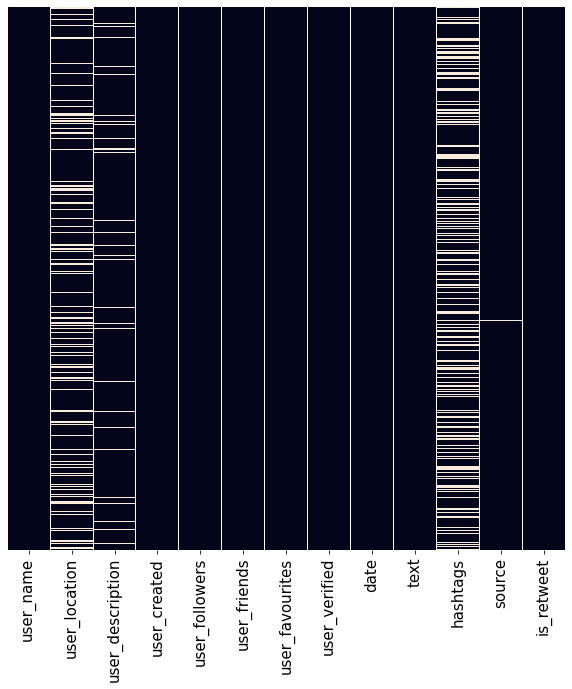

In [ ]:
#visuaize missing values in the dataframe
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)
#they are many missing values in 3 columns of the dataframe


## Data Visualization

In [ ]:
#lets visualize unique values in the dataframe
import plotly.express as px

x = np.array(df.columns)
y = df.nunique().values
fig = px.bar(x=x, y=y, height=400)
fig.show()

In [ ]:
#lets find out the locations of the users
fig = px.bar(x=df.user_location.value_counts().index[:10],
            y=df.user_location.value_counts().values[:10])
fig.show()

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
# #lets visualizes sources top users
# !pip install --upgrade plotly


# df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
#     'user_name':'tweet_count','index':'user_name'})
# fig =  px.treemap(df_username_count.head(30), path=['user_name'], values='tweet_count',
#                 title="<b>TreeMap for Top30 users by number of tweets</b>") 

# fig.show()


In [ ]:
# df_username_count.head()

In [ ]:
px.treemap?

In [ ]:
#lets visualize frequence of users added over years
import plotly.graph_objs as go


df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year

data2 = df['year_created'].value_counts().reset_index().rename(columns = {
    'year_created' : 'count', 'index' : 'year_added'}).sort_values('year_added')[1:] # Since twitter was started from 2006
data2['percent'] = data2['count'].apply(lambda x : 100*x/sum(data2['count']))

t1 = go.Scatter(x=data2['year_added'], y=data2["count"], marker=dict(color="#a678de"))

layout = go.Layout(title="<b>Users added over the years</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(t1, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Users",title_x=0.5)
fig.show()

In [ ]:
#using corona
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(12,6))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



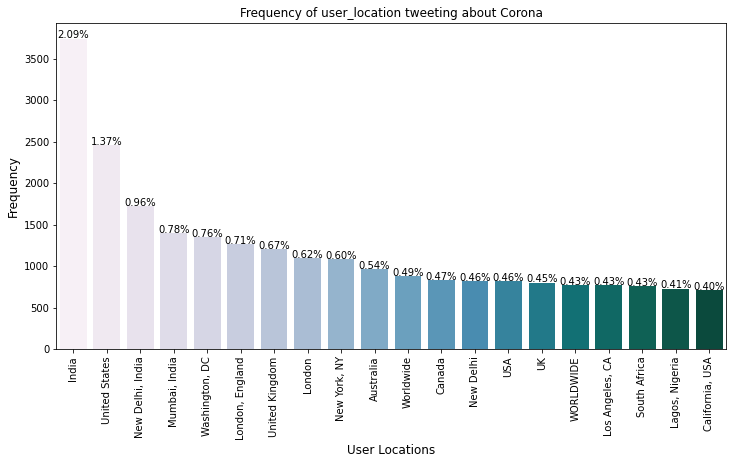

In [ ]:
#user locations tweeting about corona
plot_frequency_charts(df, 'user_location', 'User Locations', 'PuBuGn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



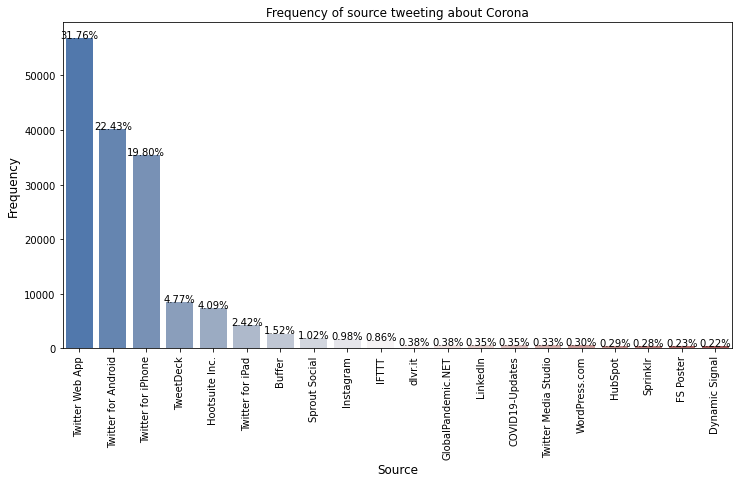

In [ ]:
#mostly use sources where topic of tweet is corona
plot_frequency_charts(df, 'source','Source', 'vlag')

In [ ]:
#lets create a new column  for sentiments of the text
#for performing sentiment analysis only text and its corressponding label matters
#for corressponding labels we will be using TextBlob

from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

## Data Preprocessing

In [ ]:
x = get_sentiment(df.text[0])
print(x)
print(type(x))

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}
<class 'dict'>


In [ ]:
df['sentiment'] = df['text'].apply(lambda x: get_sentiment(x)['sentiment'])

In [ ]:
#subsetting the important columns in the dataset for classification
sentiment_df = df.loc[:, ['text', 'sentiment']]
sentiment_df.head()

,text,sentiment
0,If I smelled the scent of hand sanitizers toda...,Negative
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Positive
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Neutral
3,@brookbanktv The one gift #COVID19 has give me...,Neutral
4,25 July : Media Bulletin on Novel #CoronaVirus...,Neutral


In [ ]:
#preprocessing text like lowering of words, remove puctuations, links, lemmatize the word, and remve emojis
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import regex as re

punc=string.punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()



#function to perform cleaning of text

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Function to remove emojis
# source kaggle
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

    
# cleaned text and removing emojis using apply method
sentiment_df['cleaned_text'] = sentiment_df['text'].apply(lambda x: clean_text(x))
sentiment_df['cleaned_text'] = sentiment_df['cleaned_text'].apply(lambda x: remove_emoji(x))

In [ ]:
sentiment_df.cleaned_text

0         smelled scent hand sanitizers today someone pa...
1         hey yankee yankeespr mlb wouldnt made sense pl...
2         wdunlap realdonaldtrump trump never claimed ho...
3         brookbanktv one gift give appreciation simple ...
4         july medium bulletin novel coronavirusupdates ...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                                    year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106      student test positive major university abc news
179107                                           stop see …
Name: cleaned_text, Length: 179108, dtype: object

In [ ]:
sentiment_df.cleaned_text[5]

'coronavirus death continue rise almost bad ever politician business want…'

In [ ]:
len(set(text_str))

905

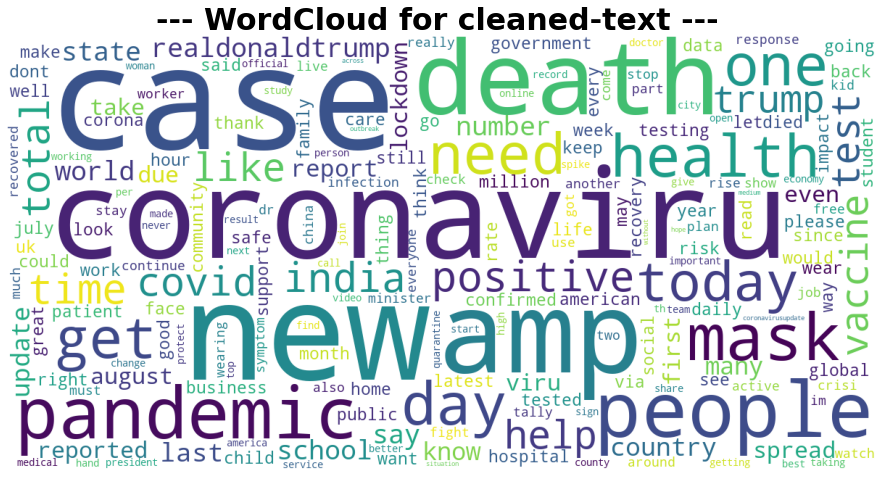

In [ ]:
# visualizing words using wordcloud


from wordcloud import WordCloud
def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)
text_str = " ".join(sentiment_df.cleaned_text.astype('str'))
wordcloud(text_str, "cleaned-text", "white")

[link text](https:// [link text](https://))## Modelling

In [ ]:
#storing the results of each of the models

desc = {}
desc['model'] = []
desc['hyperparamerer_tune'] = []
desc['feature_extractor'] = []
desc['accuracy'] = []
desc['balanced_accuracy'] = []

def display_df(desc):
  output = pd.DataFrame(desc)
  return output

In [ ]:
#import feature extractors and models

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
#splitting our dataset

x_train, x_test, y_train, y_test = train_test_split(sentiment_df.cleaned_text, sentiment_df.sentiment, stratify=sentiment_df.sentiment, random_state=0, test_size=0.20)
print("x-train shape = ", x_train.shape)
print("x_test shape = ", x_test.shape)

x-train shape =  (143286,)
x_test shape =  (35822,)


In [ ]:
#extracting features from from text using bag of words and TfidfVectorizer

bag_of_words = CountVectorizer(max_features=650)
tfidf = TfidfVectorizer(max_features=650)
#extracting features from bag of words
x_train_bg = bag_of_words.fit_transform(x_train)
x_test_bg = bag_of_words.transform(x_test)
#extracting features from tfidf vectorizer
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

In [ ]:
x_train_bg.shape

(143286, 650)

### naive bayes

In [ ]:
model = GaussianNB()
model.fit(x_train_bg.toarray(), y_train)
y_pred = model.predict(x_test_bg.toarray())
accuracy_score(y_test, y_pred)


0.6927586399419351

In [ ]:
#storing the results
desc['model'].append('Guassian Naive bayes')
desc['feature_extractor'].append('Bag Of words')
desc['hyperparamerer_tune'].append('nothing')
desc['accuracy'].append(accuracy_score(y_test, y_pred))
desc['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))

In [ ]:
display_df(desc)

,model,hyperparamerer_tune,feature_extractor,accuracy,balanced_accuracy
0,Guassian Naive bayes,nothing,Bag Of words,0.692759,0.636655


In [ ]:
balanced_accuracy_score(y_test, y_pred)

0.6366549665831553

In [ ]:
sentiment_df.sentiment.value_counts()

Neutral     74862
Positive    74640
Negative    29606
Name: sentiment, dtype: int64

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 2457,  2808,   656],
       [  676, 13849,   448],
       [ 2160,  4258,  8510]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

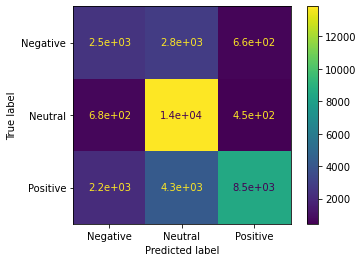

In [ ]:
plot_confusion_matrix(model, x_test_bg.toarray(), y_test)

In [ ]:
#tfidf vectorizer feature extractor
model2 = GaussianNB()
model2.fit(x_train_tf.toarray(), y_train)
y_pred = model.predict(x_test_tf.toarray())
accuracy_score(y_test, y_pred)

0.6137569091619675

In [ ]:
balanced_accuracy_score(y_test, y_pred)

0.565148683042423

In [ ]:
#storing the results achienved
desc['model'].append('Guassian Naive bayes')
desc['feature_extractor'].append('Tfidf Vectorizer')
desc['hyperparamerer_tune'].append('nothing')
desc['accuracy'].append(accuracy_score(y_test, y_pred))
desc['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))

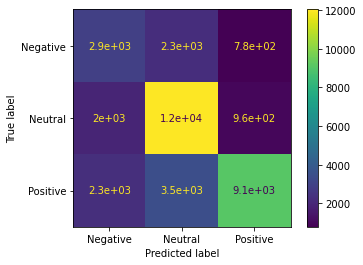

In [ ]:
plot_confusion_matrix(model2, x_test_bg.toarray(), y_test)

## Random Forest

In [ ]:
# As bag of words is performing better on feature extraction so we will only be using it only
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#initializing Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100)

#fitting data  into the model
model.fit(x_train_bg.toarray(), y_train)

#making predictions
y_pred = model.predict(x_test_bg.toarray())

#evaluating results on accuracies
acc=accuracy_score(y_test, y_pred)
bal=balanced_accuracy_score(y_test, y_pred)

In [ ]:
desc['model'].append('Random Forest')
desc['feature_extractor'].append('Bag Of words')
desc['hyperparamerer_tune'].append('nothing')
desc['accuracy'].append(acc)
desc['balanced_accuracy'].append(bal)

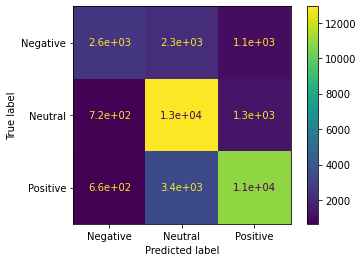

In [ ]:
#visualizing results
plot_confusion_matrix(model, x_test_bg.toarray(), y_test)

### Random forest hyperparamenter tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)


In [ ]:
rf_RandomGrid.fit(x_train_bg.toarray(), y_train)
rf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 24.7min finished


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 98}

In [ ]:
model = RandomForestClassifier(n_estimators= 100,min_samples_split= 5,min_samples_leaf= 1,
                               max_features= 'auto', max_depth=4, bootstrap= True)
model.fit(x_train_bg.toarray(), y_train)
y_pred = model.predict(x_test_bg.toarray())
acc = accuracy_score(y_test, y_pred)
bac = balanced_accuracy_score(y_test, y_pred)


In [ ]:
desc['model'].append('Random Forest')
desc['feature_extractor'].append('Bag Of words')
desc['hyperparamerer_tune'].append('Randomized Search Cv')
desc['accuracy'].append(acc)
desc['balanced_accuracy'].append(bal)

In [ ]:
display_df(desc)

,model,hyperparamerer_tune,feature_extractor,accuracy,balanced_accuracy
0,Guassian Naive bayes,nothing,Bag Of words,0.692759,0.636655
1,Guassian Naive bayes,nothing,Tfidf Vectorizer,0.613757,0.565149
2,Random Forest,nothing,Bag Of words,0.736251,0.676058
3,Random Forest,Randomized Search Cv,Bag Of words,0.635475,0.676058


## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from  tensorflow.keras import layers

In [ ]:
sentiment_df.head()

,text,sentiment,cleaned_text
0,If I smelled the scent of hand sanitizers toda...,Negative,smelled scent hand sanitizers today someone pa...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Positive,hey yankee yankeespr mlb wouldnt made sense pl...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Neutral,wdunlap realdonaldtrump trump never claimed ho...
3,@brookbanktv The one gift #COVID19 has give me...,Neutral,brookbanktv one gift give appreciation simple ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,Neutral,july medium bulletin novel coronavirusupdates ...


In [ ]:
#tokenizing the text
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentiment_df.cleaned_text)

X = tokenizer.texts_to_sequences(sentiment_df.cleaned_text)

vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(sentiment_df.cleaned_text[0]))
print("\nAfter tokenizing :\n{}".format(X[0]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[0]))

Vocabulary size: 161664

Example:

Sentence:
smelled scent hand sanitizers today someone past would think intoxicated that…

After tokenizing :
[14477, 203, 3669, 17, 295, 365, 69, 86, 934]

After padding :
[14477   203  3669    17   295   365    69    86   934     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0]


In [ ]:
#defining model architecture

embedding_dim = 32
units = 256

#model training 
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    layers.Bidirectional(layers.LSTM(units,return_sequences=True)),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')
])

#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']
             )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 32)            5173248   
_________________________________________________________________
bidirectional (Bidirectional (None, 34, 512)           591872    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
sentiment_df

,text,sentiment,cleaned_text
0,If I smelled the scent of hand sanitizers toda...,Negative,smelled scent hand sanitizers today someone pa...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Positive,hey yankee yankeespr mlb wouldnt made sense pl...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Neutral,wdunlap realdonaldtrump trump never claimed ho...
3,@brookbanktv The one gift #COVID19 has give me...,Neutral,brookbanktv one gift give appreciation simple ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,Neutral,july medium bulletin novel coronavirusupdates ...
...,...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Positive,thanks iamohmai nominating wearamask challenge...
179104,2020! The year of insanity! Lol! #COVID19 http...,Positive,year insanity lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,Positive,ctvnews powerful painting juan lucena tribute ...
179106,"More than 1,200 students test positive for #CO...",Positive,student test positive major university abc news


In [ ]:
from tensorflow.keras.utils import to_categorical
mapping = {'Positive': 2, 'Negative': 0, 'Neutral': 1}
y_temp = sentiment_df.sentiment.map(mapping)
y = to_categorical(y_temp)

In [ ]:
sentiment_df.sentiment


0         Negative
1         Positive
2          Neutral
3          Neutral
4          Neutral
            ...   
179103    Positive
179104    Positive
179105    Positive
179106    Positive
179107     Neutral
Name: sentiment, Length: 179108, dtype: object

In [ ]:
y.shape

(179108, 3)

In [ ]:
X.shape

(179108, 34)

In [ ]:
# tf.config.experimental_run_functions_eagerly(True)
history = model.fit(X, y, epochs=4, validation_split=0.12, batch_size=128)


Epoch 1/4
1232/1232 [==============================] - 125s 95ms/step - loss: 0.4153 - accuracy: 0.8633 - val_loss: 0.3320 - val_accuracy: 0.9014
Epoch 2/4
1232/1232 [==============================] - 115s 93ms/step - loss: 0.2947 - accuracy: 0.9123 - val_loss: 0.3275 - val_accuracy: 0.9034
Epoch 3/4
1232/1232 [==============================] - 115s 94ms/step - loss: 0.2537 - accuracy: 0.9212 - val_loss: 0.3435 - val_accuracy: 0.9015
Epoch 4/4
1232/1232 [==============================] - 115s 93ms/step - loss: 0.2153 - accuracy: 0.9312 - val_loss: 0.3788 - val_accuracy: 0.8906


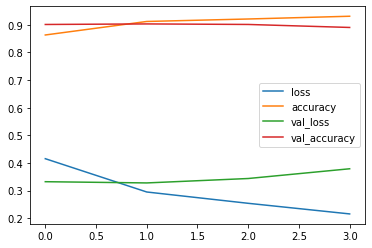

In [ ]:
df = pd.DataFrame(history.history)
df.plot()

In [ ]:
#using keras tuner to tune the hyperparameters

def create_model(hp):
  model = keras.Sequential()


  #tuning the number of embedding dimensions
  hp_embedd_dim = hp.Int('output_dim', min_value=16, max_value=32, step=4)
  model.add(layers.Embedding(input_dim=vocab_size, output_dim=hp_embedd_dim, input_length=X.shape[1]))


  #tuning number of LSTM CELLS
  hp_LSTM_units = hp.Int('units', min_value=128, max_value=512, step=128)
  model.add(layers.Bidirectional(layers.LSTM(units=hp_LSTM_units,  return_sequences=True)))

  #Flattening layer
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3, activation='softmax'))


  #compiling model
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model


In [ ]:
from tensorflow import keras
!pip install -q -U keras-tuner

import keras_tuner as kt


#early stopping callback to avoid increment in Validation accuracy
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#searching for best hyperparameters by training a model on each one of them one by one
tuner = kt.Hyperband(create_model,
                     objective='val_accuracy',
                     max_epochs=4,
                     factor=3,
                     directory='/content',
                     project_name='sentiment_analysis')
tuner.search(X, y, epochs=5, validation_split=0.2, callbacks=[stop_early])


Trial 10 Complete [00h 27m 27s]
val_accuracy: 0.8949248790740967

Best val_accuracy So Far: 0.9015967845916748
Total elapsed time: 02h 37m 43s
INFO:tensorflow:Oracle triggered exit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#getting best hyperparamenters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

#training model with given hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X, y, epochs=10, validation_split=0.2)

Epoch 1/10
4478/4478 [==============================] - 323s 71ms/step - loss: 0.4063 - accuracy: 0.8700 - val_loss: 0.3921 - val_accuracy: 0.8914
Epoch 2/10
4478/4478 [==============================] - 317s 71ms/step - loss: 0.3173 - accuracy: 0.9054 - val_loss: 0.3402 - val_accuracy: 0.9002
Epoch 3/10
4478/4478 [==============================] - 321s 72ms/step - loss: 0.2895 - accuracy: 0.9121 - val_loss: 0.3624 - val_accuracy: 0.8983
Epoch 4/10
4478/4478 [==============================] - 316s 71ms/step - loss: 0.2728 - accuracy: 0.9163 - val_loss: 0.3539 - val_accuracy: 0.8995
Epoch 5/10
4478/4478 [==============================] - 322s 72ms/step - loss: 0.2632 - accuracy: 0.9179 - val_loss: 0.3620 - val_accuracy: 0.8994
Epoch 6/10
4478/4478 [==============================] - 321s 72ms/step - loss: 0.2586 - accuracy: 0.9199 - val_loss: 0.3608 - val_accuracy: 0.8944
Epoch 7/10
4478/4478 [==============================] - 318s 71ms/step - loss: 0.2540 - accuracy: 0.9206 - val_loss: 0

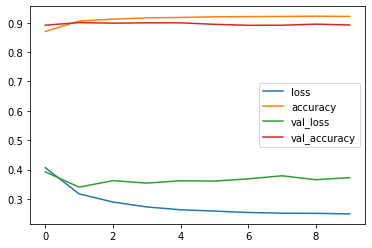

In [ ]:
df = pd.DataFrame(history.history)
df.plot()